In [1]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/train/angry/15612.jpg  
  inflating: __MACOSX/images/train/angry/._15612.jpg  
  inflating: images/train/angry/29855.jpg  
  inflating: __MACOSX/images/train/angry/._29855.jpg  
  inflating: images/train/angry/20050.jpg  
  inflating: __MACOSX/images/train/angry/._20050.jpg  
  inflating: images/train/angry/22647.jpg  
  inflating: __MACOSX/images/train/angry/._22647.jpg  
  inflating: images/train/angry/1863.jpg  
  inflating: __MACOSX/images/train/angry/._1863.jpg  
  inflating: images/train/angry/22121.jpg  
  inflating: __MACOSX/images/train/angry/._22121.jpg  
  inflating: images/train/angry/27059.jpg  
  inflating: __MACOSX/images/train/angry/._27059.jpg  
  inflating: images/train/angry/16290.jpg  
  inflating: __MACOSX/images/train/angry/._16290.jpg  
  inflating: images/train/angry/29060.jpg  
  inflating: __MACOSX/images/train/angry/._29060.jpg  
  inflating: images/train/angry/33986.jpg  
  inflating: __M

In [4]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from imutils import paths
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization,Input,GlobalAveragePooling2D,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import glob
import shutil
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import math

%matplotlib inline

In [5]:
TRAIN_DIR_expr = '/content/images/train/'

TEST_DIR_expr = '/content/images/test/'

In [6]:

def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [8]:
train_expr = pd.DataFrame()
train_expr['image'], train_expr['label'] = load_dataset(TRAIN_DIR_expr)
train_expr = train_expr.sample(frac=1).reset_index(drop=True)


disgust Completed
neutral Completed
happy Completed
surprise Completed
fear Completed
sad Completed
angry Completed


In [9]:
test_expr = pd.DataFrame()
test_expr['image'], test_expr['label'] = load_dataset(TEST_DIR_expr)


disgust Completed
neutral Completed
happy Completed
surprise Completed
fear Completed
sad Completed
angry Completed


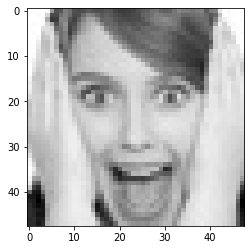

In [10]:
from PIL import Image
img_expr = Image.open(train_expr['image'][0])
plt.imshow(img_expr, cmap='gray');

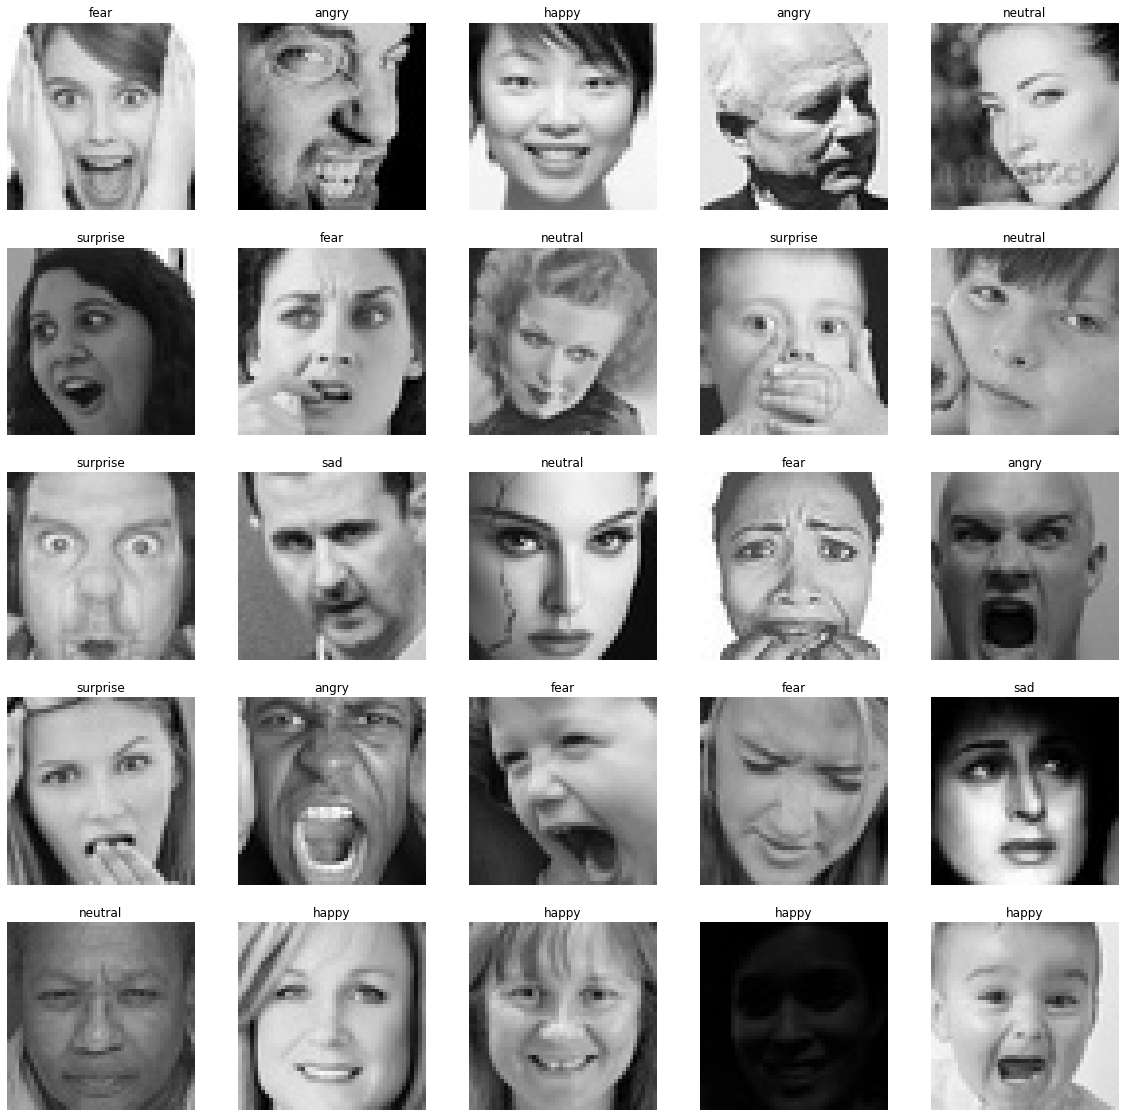

In [11]:
plt.figure(figsize=(20,20))
files = train_expr.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img_expr = load_img(file)
    img_expr = np.array(img_expr)
    plt.imshow(img_expr)
    plt.title(label)
    plt.axis('off')

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img_ex = load_img(image, grayscale=True)
        img_ex = np.array(img_ex)
        features.append(img_ex)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [13]:
from tqdm.notebook import tqdm
train_features_expr = extract_features(train_expr['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [14]:
test_features_expr = extract_features(test_expr['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [15]:
x_expr_train = train_features_expr/255.0
x_expr_test = test_features_expr/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder
le_expre = LabelEncoder()
le_expre.fit(train_expr['label'])
y_expression_train = le_expre.transform(train_expr['label'])
y_expression_test = le_expre.transform(test_expr['label'])

In [17]:
y_expr_train = to_categorical(y_expression_train, num_classes=7)
y_expr_test = to_categorical(y_expression_test, num_classes=7)

In [18]:
input_expre_shape = (48, 48, 1)
output_class = 7

In [19]:
model_expr = Sequential()
model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_expre_shape))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Flatten())

model_expr.add(Dense(512, activation='relu'))
model_expr.add(Dropout(0.4))
model_expr.add(Dense(256, activation='relu'))
model_expr.add(Dropout(0.3))

model_expr.add(Dense(output_class, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model_expr.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [20]:
history = model_expr.fit(x=x_expr_train, y=y_expr_train, batch_size=128, epochs=5,
                         validation_data=(x_expr_test, y_expr_test))
_, acc = model_expr.evaluate(x_expr_test, y_expr_test)
print('> %.3f' % (acc * 100.0))

Epoch 1/5
226/226 [==============================] - 1626s 7s/step - loss: 1.8289 - accuracy: 0.2403 - val_loss: 1.8208 - val_accuracy: 0.2583
Epoch 2/5
226/226 [==============================] - 1586s 7s/step - loss: 1.8123 - accuracy: 0.2480 - val_loss: 1.8195 - val_accuracy: 0.2583
Epoch 3/5
226/226 [==============================] - 1582s 7s/step - loss: 1.8039 - accuracy: 0.2468 - val_loss: 1.8353 - val_accuracy: 0.2583
Epoch 4/5
226/226 [==============================] - 1571s 7s/step - loss: 1.7990 - accuracy: 0.2469 - val_loss: 1.8380 - val_accuracy: 0.2583
Epoch 5/5
221/221 [==============================] - 56s 252ms/step - loss: 1.8385 - accuracy: 0.2482
> 24.823


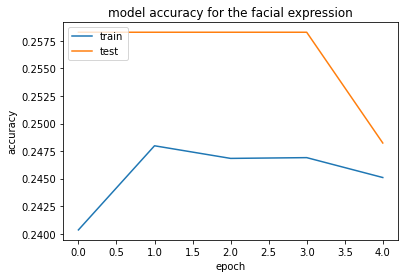

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for the facial expression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model_expr = Sequential()
model_expr.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_expre_shape))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Flatten())

model_expr.add(Dense(256, activation='relu'))
model_expr.add(Dropout(0.4))
model_expr.add(Dense(128, activation='relu'))
model_expr.add(Dropout(0.3))

model_expr.add(Dense(output_class, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model_expr.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [23]:
history = model_expr.fit(x=x_expr_train, y=y_expr_train, batch_size=64, epochs=10,
                         validation_data=(x_expr_test, y_expr_test))
_, acc = model_expr.evaluate(x_expr_test, y_expr_test)
print('> %.3f' % (acc * 100.0))

Epoch 1/10
451/451 [==============================] - 130s 287ms/step - loss: 1.8242 - accuracy: 0.2446 - val_loss: 1.8111 - val_accuracy: 0.2583
Epoch 2/10
451/451 [==============================] - 123s 272ms/step - loss: 1.8141 - accuracy: 0.2486 - val_loss: 1.8112 - val_accuracy: 0.2583
Epoch 3/10
451/451 [==============================] - 125s 276ms/step - loss: 1.8128 - accuracy: 0.2485 - val_loss: 1.8117 - val_accuracy: 0.2583
Epoch 4/10
451/451 [==============================] - 123s 272ms/step - loss: 1.8133 - accuracy: 0.2486 - val_loss: 1.8099 - val_accuracy: 0.2583
Epoch 5/10
451/451 [==============================] - 130s 287ms/step - loss: 1.8113 - accuracy: 0.2486 - val_loss: 1.8098 - val_accuracy: 0.2583
Epoch 6/10
451/451 [==============================] - 127s 282ms/step - loss: 1.8048 - accuracy: 0.2483 - val_loss: 1.8161 - val_accuracy: 0.2583
Epoch 7/10
451/451 [==============================] - 127s 282ms/step - loss: 1.8012 - accuracy: 0.2484 - val_loss: 1.8276 -

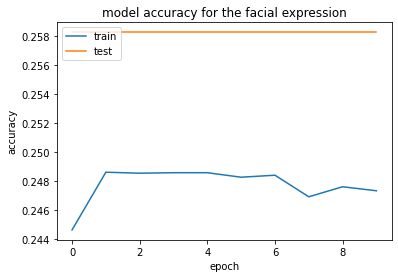

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for the facial expression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model_expr = Sequential()
model_expr.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_expre_shape))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))

model_expr.add(Flatten())

model_expr.add(Dense(128, activation='relu'))
model_expr.add(Dropout(0.4))

model_expr.add(Dense(output_class, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model_expr.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [26]:
history = model_expr.fit(x=x_expr_train, y=y_expr_train, batch_size=64, epochs=50,
                         validation_data=(x_expr_test, y_expr_test))
_, acc = model_expr.evaluate(x_expr_test, y_expr_test)
print('> %.3f' % (acc * 100.0))

Epoch 1/50
451/451 [==============================] - 119s 261ms/step - loss: 1.8251 - accuracy: 0.2446 - val_loss: 1.8124 - val_accuracy: 0.2583
Epoch 2/50
451/451 [==============================] - 117s 260ms/step - loss: 1.8068 - accuracy: 0.2501 - val_loss: 1.7888 - val_accuracy: 0.2603
Epoch 3/50
451/451 [==============================] - 114s 254ms/step - loss: 1.7516 - accuracy: 0.2791 - val_loss: 1.6982 - val_accuracy: 0.3266
Epoch 4/50
451/451 [==============================] - 116s 257ms/step - loss: 1.6986 - accuracy: 0.3161 - val_loss: 1.6569 - val_accuracy: 0.3442
Epoch 5/50
451/451 [==============================] - 114s 254ms/step - loss: 1.6567 - accuracy: 0.3427 - val_loss: 1.6190 - val_accuracy: 0.3599
Epoch 6/50
451/451 [==============================] - 114s 252ms/step - loss: 1.6142 - accuracy: 0.3618 - val_loss: 1.5731 - val_accuracy: 0.4035
Epoch 7/50
451/451 [==============================] - 115s 254ms/step - loss: 1.5846 - accuracy: 0.3772 - val_loss: 1.5172 -

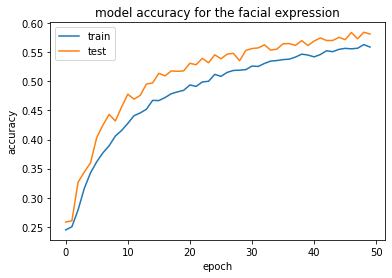

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for the facial expression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
model_expr = Sequential()
model_expr.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_expre_shape))
model_expr.add(MaxPooling2D(pool_size=(2,2)))

model_expr.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))

model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))

model_expr.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Flatten())

model_expr.add(Dense(128, activation='relu'))
model_expr.add(Dense(7, activation='softmax'))

model_expr.add(Dense(output_class, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model_expr.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [29]:
history = model_expr.fit(x=x_expr_train, y=y_expr_train, batch_size=64, epochs=100,
                         validation_data=(x_expr_test, y_expr_test))
_, acc = model_expr.evaluate(x_expr_test, y_expr_test)
print('> %.3f' % (acc * 100.0))

Epoch 1/100
451/451 [==============================] - 143s 314ms/step - loss: 1.8257 - accuracy: 0.2449 - val_loss: 1.8040 - val_accuracy: 0.2583
Epoch 2/100
451/451 [==============================] - 125s 278ms/step - loss: 1.8035 - accuracy: 0.2485 - val_loss: 1.7956 - val_accuracy: 0.2579
Epoch 3/100
451/451 [==============================] - 124s 274ms/step - loss: 1.7957 - accuracy: 0.2493 - val_loss: 1.7944 - val_accuracy: 0.2577
Epoch 4/100
451/451 [==============================] - 128s 285ms/step - loss: 1.7908 - accuracy: 0.2489 - val_loss: 1.7849 - val_accuracy: 0.2608
Epoch 5/100
451/451 [==============================] - 129s 285ms/step - loss: 1.7856 - accuracy: 0.2511 - val_loss: 1.7750 - val_accuracy: 0.2583
Epoch 6/100
451/451 [==============================] - 125s 276ms/step - loss: 1.7782 - accuracy: 0.2501 - val_loss: 1.7657 - val_accuracy: 0.2587
Epoch 7/100
451/451 [==============================] - 128s 284ms/step - loss: 1.7473 - accuracy: 0.2792 - val_loss: 1

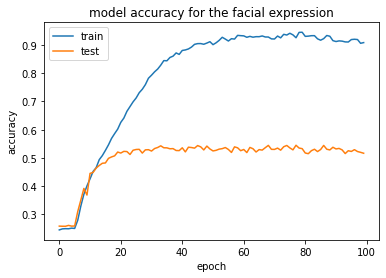

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for the facial expression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model_expr = Sequential()
model_expr.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_expre_shape))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.2))

model_expr.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.3))

model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.4))


model_expr.add(Flatten())

model_expr.add(Dense(128, activation='relu'))
model_expr.add(Dropout(0.5))
model_expr.add(Dense(7, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9)
model_expr.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [32]:
history = model_expr.fit(x=x_expr_train, y=y_expr_train, batch_size=64, epochs=100,
                         validation_data=(x_expr_test, y_expr_test))
_, acc = model_expr.evaluate(x_expr_test, y_expr_test)
print('> %.3f' % (acc * 100.0))

Epoch 1/100
451/451 [==============================] - 133s 294ms/step - loss: 1.8223 - accuracy: 0.2429 - val_loss: 1.8036 - val_accuracy: 0.2583
Epoch 2/100
451/451 [==============================] - 113s 250ms/step - loss: 1.7950 - accuracy: 0.2492 - val_loss: 1.7789 - val_accuracy: 0.2583
Epoch 3/100
451/451 [==============================] - 114s 252ms/step - loss: 1.7698 - accuracy: 0.2677 - val_loss: 1.7489 - val_accuracy: 0.2927
Epoch 4/100
451/451 [==============================] - 117s 261ms/step - loss: 1.7186 - accuracy: 0.3081 - val_loss: 1.6921 - val_accuracy: 0.3391
Epoch 5/100
451/451 [==============================] - 118s 261ms/step - loss: 1.6765 - accuracy: 0.3328 - val_loss: 1.6207 - val_accuracy: 0.3650
Epoch 6/100
451/451 [==============================] - 118s 261ms/step - loss: 1.6366 - accuracy: 0.3567 - val_loss: 1.5782 - val_accuracy: 0.3930
Epoch 7/100
451/451 [==============================] - 122s 272ms/step - loss: 1.5976 - accuracy: 0.3740 - val_loss: 1

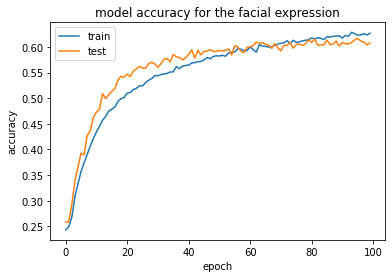

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for the facial expression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_expr = Sequential()
model_expr.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_expre_shape))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.5))

model_expr.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.5))

model_expr.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model_expr.add(MaxPooling2D(pool_size=(2,2)))
model_expr.add(Dropout(0.5))



model_expr.add(Flatten())

model_expr.add(Dense(128, activation='relu'))
model_expr.add(Dropout(0.5))
model_expr.add(Dense(64, activation='relu'))
model_expr.add(Dropout(0.3))

model_expr.add(Dense(output_class, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model_expr.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model_expr.fit(x=x_expr_train, y=y_expr_train, batch_size=64, epochs=300, 
                         validation_data=(x_expr_test, y_expr_test))
_, acc = model_expr.evaluate(x_expr_test, y_expr_test)
print('> %.3f' % (acc * 100.0))

Epoch 1/300
451/451 [==============================] - 127s 278ms/step - loss: 1.8274 - accuracy: 0.2428 - val_loss: 1.8100 - val_accuracy: 0.2583
Epoch 2/300
451/451 [==============================] - 118s 262ms/step - loss: 1.8143 - accuracy: 0.2486 - val_loss: 1.8087 - val_accuracy: 0.2583
Epoch 3/300
451/451 [==============================] - 126s 279ms/step - loss: 1.8126 - accuracy: 0.2486 - val_loss: 1.8093 - val_accuracy: 0.2583
Epoch 4/300
451/451 [==============================] - 122s 270ms/step - loss: 1.8126 - accuracy: 0.2486 - val_loss: 1.8097 - val_accuracy: 0.2583
Epoch 5/300
451/451 [==============================] - 119s 265ms/step - loss: 1.8061 - accuracy: 0.2496 - val_loss: 1.7980 - val_accuracy: 0.2583
Epoch 6/300
451/451 [==============================] - 124s 275ms/step - loss: 1.7904 - accuracy: 0.2530 - val_loss: 1.7609 - val_accuracy: 0.2586
Epoch 7/300
451/451 [==============================] - 120s 267ms/step - loss: 1.7580 - accuracy: 0.2751 - val_loss: 1

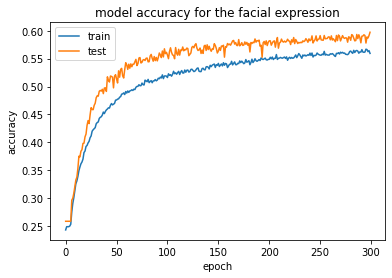

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for the facial expression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
Experiments = ['Exp-1','Exp-2','Exp-3','Exp-4','Exp-5','Exp-6']
Accuracy = [25,26,58,52,61,60]


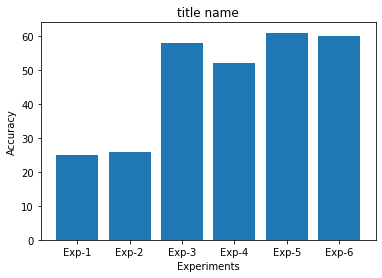

In [6]:
import matplotlib.pyplot as plt
plt.bar(Experiments,Accuracy)
plt.title('title name')
plt.xlabel('Experiments')
plt.ylabel('Accuracy')
plt.show()